In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [ ]:
t_stats_origin_df = pd.read_csv('./t_stats_strategy3_origin')

In [101]:
case = 'fairfax'
path_origin = './t_stats_strategy3_origin/arrivals_fairfax_vect_bg_1_real_departure_time_evacuation.csv'
t_stats_origin_df = pd.read_csv(path_origin)

path_widen5 = './t_stats_strategy3_widen_Route5/arrivals_fairfax_vect_bg_1_real_departure_time_evacuation.csv'
t_stats_widen5_df = pd.read_csv(path_widen5)

path_widen5_6 = './t_stats_strategy3_widen_Routes5-6/arrivals_fairfax_vect_bg_1_real_departure_time_evacuation.csv'
t_stats_widen5_6_df = pd.read_csv(path_widen5_6)

path_widen5_7 = './t_stats_strategy3_widen_Routes5-7/arrivals_fairfax_vect_bg_1_real_departure_time_evacuation.csv'
t_stats_widen5_7_df = pd.read_csv(path_widen5_7)

FileNotFoundError: [Errno 2] No such file or directory: './t_stats_strategy3_origin/arrivals_fairfax_vect_bg_1_real_departure_time_evacuation.csv'

In [14]:
t_stats_origin_df['arrival_count_before'] = np.append(0,t_stats_origin_df['arrival_count'].values[:-1])
t_stats_widen5_df['arrival_count_before'] = np.append(0,t_stats_widen5_df['arrival_count'].values[:-1])
t_stats_widen5_6_df['arrival_count_before'] = np.append(0,t_stats_widen5_6_df['arrival_count'].values[:-1])
t_stats_widen5_7_df['arrival_count_before'] = np.append(0,t_stats_widen5_7_df['arrival_count'].values[:-1])

In [21]:
t_stats_origin_df['current_count'] = t_stats_origin_df['arrival_count'] - t_stats_origin_df['arrival_count_before']
t_stats_widen5_df['current_count'] = t_stats_widen5_df['arrival_count'] - t_stats_widen5_df['arrival_count_before']
t_stats_widen5_6_df['current_count'] = t_stats_origin_df['arrival_count'] - t_stats_origin_df['arrival_count_before']
t_stats_widen5_7_df['current_count'] = t_stats_origin_df['arrival_count'] - t_stats_origin_df['arrival_count_before']

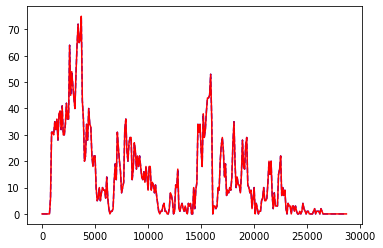

In [22]:
plt.figure()
plt.plot(t_stats_origin_df['t'], t_stats_origin_df['current_count'], 'b--')
plt.plot(t_stats_widen5_7_df['t'], t_stats_widen5_7_df['current_count'], 'r-')

In [87]:
links_in_fairfax_df = pd.read_csv(
    '/Users/apple/Documents/GitHub/spatial_queue/benchmark_Marin/traffic_inputs/fairfax/links_in_fairfax.csv')
links_in_fairfax_list = links_in_fairfax_df['link_id'].values.tolist()
links_in_fairfax_list = [str(i) for i in links_in_fairfax_list]
# 逃出fairfax的图
evacuate_fairfax_count_df_widen_Route5 = pd.DataFrame(columns = ['time', 'count'])
evacuate_agent_list = np.array([]) #记录跑出去的agent_list
for i in tqdm(range(0, 31200,100)):
    path = './agent_stats_strategy3_widen_Route5/{}_vect_at_{}_bg_1_real_departure_time_agent.csv'.format(case,i)
    agent_df = pd.read_csv(path)
    agent_df = agent_df.loc[agent_df['agent_id'] >= 120000, ['agent_id','current_link','agent_status']].copy()
    agent_df['current_link'] = agent_df['current_link'].astype('str')
    agent_df['current_link'] = agent_df['current_link'].apply(lambda x: x[:-2] if x[-2:]=='.0' else x)
    agent_df['current_link_fl'] = agent_df['current_link'].apply(lambda x: x[0])
    agent_id_evacuated = agent_df.loc[(~agent_df['current_link'].isin(links_in_fairfax_list)) 
                                      & (agent_df['agent_status']!=0) & (agent_df['current_link_fl']!='v'),'agent_id'].values
    evacuate_agent_list = np.concatenate((evacuate_agent_list, agent_id_evacuated))
    evacuate_agent_list = np.unique(evacuate_agent_list)
    evacuate_fairfax_count_df_widen_Route5 = evacuate_fairfax_count_df_widen_Route5.append([{'time':i,'count':len(evacuate_agent_list)}], ignore_index = True)

 29%|██▉       | 92/312 [00:10<00:21, 10.18it/s]/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
100%|██████████| 312/312 [00:23<00:00, 13.09it/s]


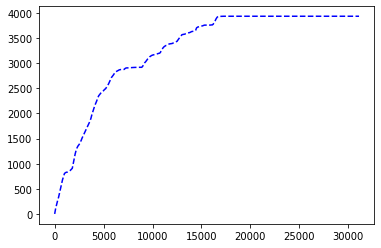

In [88]:
plt.figure()
plt.plot(evacuate_fairfax_count_df_widen_Route5['time'], evacuate_fairfax_count_df_widen_Route5['count'], 'b--')

In [90]:
links_in_fairfax_df = pd.read_csv(
    '/Users/apple/Documents/GitHub/spatial_queue/benchmark_Marin/traffic_inputs/fairfax/links_in_fairfax.csv')
links_in_fairfax_list = links_in_fairfax_df['link_id'].values.tolist()
links_in_fairfax_list = [str(i) for i in links_in_fairfax_list]
# 逃出fairfax的图
evacuate_fairfax_count_df_widen_Routes5_6 = pd.DataFrame(columns = ['time', 'count'])
evacuate_agent_list = np.array([]) #记录跑出去的agent_list
for i in tqdm(range(0, 30300,100)):
    path = './agent_stats_strategy3_widen_Routes5-6/{}_vect_at_{}_bg_1_real_departure_time_agent.csv'.format(case,i)
    agent_df = pd.read_csv(path)
    agent_df = agent_df.loc[agent_df['agent_id'] >= 120000, ['agent_id','current_link','agent_status']].copy()
    agent_df['current_link'] = agent_df['current_link'].astype('str')
    agent_df['current_link'] = agent_df['current_link'].apply(lambda x: x[:-2] if x[-2:]=='.0' else x)
    agent_df['current_link_fl'] = agent_df['current_link'].apply(lambda x: x[0])
    agent_id_evacuated = agent_df.loc[(~agent_df['current_link'].isin(links_in_fairfax_list)) 
                                      & (agent_df['agent_status']!=0) & (agent_df['current_link_fl']!='v'),'agent_id'].values
    evacuate_agent_list = np.concatenate((evacuate_agent_list, agent_id_evacuated))
    evacuate_agent_list = np.unique(evacuate_agent_list)
    evacuate_fairfax_count_df_widen_Routes5_6 = evacuate_fairfax_count_df_widen_Routes5_6.append([{'time':i,'count':len(evacuate_agent_list)}], ignore_index = True)

 20%|██        | 62/303 [00:08<00:25,  9.38it/s]/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
 30%|███       | 92/303 [00:11<00:20, 10.16it/s]/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
100%|██████████| 303/303 [00:24<00:00, 12.32it/s]


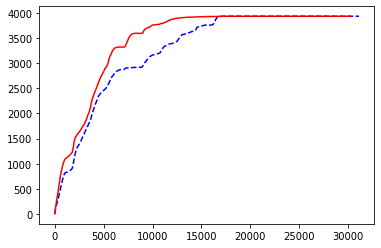

In [91]:
plt.figure()
plt.plot(evacuate_fairfax_count_df_widen_Route5['time'], evacuate_fairfax_count_df_widen_Route5['count'], 'b--')
plt.plot(evacuate_fairfax_count_df_widen_Routes5_6['time'], evacuate_fairfax_count_df_widen_Routes5_6['count'], 'r-')